In [100]:
import numpy as np
import time as t
import matplotlib.pyplot as plt
import os

## Scatter Plot

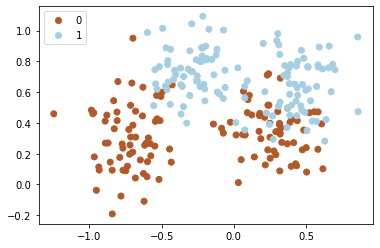

In [97]:
# Loading synthetic dataset
train = np.loadtxt("/Users/harsh/Downloads/synth.tr.txt",skiprows=1)
train_x = train[:,:-1]
train_y = train[:,-1].astype(int)

test_data = np.loadtxt("/Users/harsh/Downloads/synth.te.txt",skiprows=1)
test_x = test_data[:,:-1]
test_y = test_data[:,-1].astype(int)

y = train_y
x1 = train_x[:,0]
x2 = train_x[:,1]

scatter = plt.scatter(x1, x2, c = y, cmap="Paired_r")
plt.legend(handles=scatter.legend_elements()[0], labels=[0,1])
plt.savefig('scatter.png')

In [102]:
np.correlate(x1, x2)

array([-3.07277079])

# Classification

## Classifier Functions

In [2]:
def euclid_classifier(xtrain, ytrain, xtest, ytest, pw):
    t1 = t.time()
    
    pw0 = pw
    pw1 = 1-pw

    nn, nf = xtest.shape

    # for class 0
    arr = xtrain[ytrain == 0]
    covs0 = np.cov(np.transpose(arr))
    means0 = np.mean(arr, axis = 0)

    # for class 1
    arr = xtrain[ytrain == 1]
    covs1 = np.cov(np.transpose(arr))
    means1 = np.mean(arr, axis = 0)

    # for euclidean distance
    covavg = (covs0+covs1)/2
    avg_var = np.mean(np.diagonal(covavg))

    # initialising yhat array
    yhat = np.ones(len(ytest))
    
    for i in range(len(ytest)):
        #for class 0
        d = np.dot(xtest[i]-means0, xtest[i]-means0)
        g0 = -d/(2*avg_var) + np.log(pw0)
        
        # for class 1
        d = np.dot(xtest[i]-means1, xtest[i]-means1)
        g1 = -d/(2*avg_var) + np.log(pw1)
        
        # if g0>g1, then i belongs to 0, else to 1
        if(g0>g1):
            yhat[i] = 0
            
    overall_acc = np.sum(yhat == ytest)/len(ytest)
    class0_acc = np.sum(yhat[ytest == 0] == 0)/np.sum(ytest == 0)
    class1_acc = np.sum(yhat[ytest == 1] == 1)/np.sum(ytest == 1)
    
    t2 = t.time()
    tt = t2-t1
    
    return yhat, overall_acc, class0_acc, class1_acc, tt

In [3]:
def maha_classifier(xtrain, ytrain, xtest, ytest, pw):
    t1 = t.time()
    
    pw0 = pw
    pw1 = 1-pw

    nn, nf = xtest.shape

    # for class 0
    arr = xtrain[ytrain == 0]
    covs0 = np.cov(np.transpose(arr))
    means0 = np.mean(arr, axis = 0)

    # for class 1
    arr = xtrain[ytrain == 1]
    covs1 = np.cov(np.transpose(arr))
    means1 = np.mean(arr, axis = 0)

    # for Mahalanobis distance, avg of the two covariance matrix is chosen
    covavg = (covs0+covs1)/2

    # initialising yhat array
    yhat = np.ones(len(ytest))
    
    for i in range(len(ytest)):
        #for class 0
        d = np.matmul(np.matmul(xtest[i]-means0, np.linalg.inv(covavg)), xtest[i]-means0)
        g0 = -d + np.log(pw0)
        
        # for class 1
        d = np.matmul(np.matmul(xtest[i]-means1, np.linalg.inv(covavg)), xtest[i]-means1)
        g1 = -d + np.log(pw1)
        
        # if g0>g1, then i belongs to 0, else to 1
        if(g0>g1):
            yhat[i] = 0
            
    overall_acc = np.sum(yhat == ytest)/len(ytest)
    class0_acc = np.sum(yhat[ytest == 0] == 0)/np.sum(ytest == 0)
    class1_acc = np.sum(yhat[ytest == 1] == 1)/np.sum(ytest == 1)

    t2 = t.time()
    tt = t2-t1
    
    return yhat, overall_acc, class0_acc, class1_acc, tt

In [4]:
def bayes_classifier(xtrain, ytrain, xtest, ytest, pw):
    t1 = t.time()
    
    pw0 = pw
    pw1 = 1-pw

    nn, nf = xtest.shape

    # for class 0
    arr = xtrain[ytrain == 0]
    covs0 = np.cov(np.transpose(arr))
    means0 = np.mean(arr, axis = 0)

    # for class 1
    arr = xtrain[ytrain == 1]
    covs1 = np.cov(np.transpose(arr))
    means1 = np.mean(arr, axis = 0)

    # initialising yhat array
    yhat = np.ones(len(ytest))
    
    for i in range(len(ytest)):
        d = np.matmul(np.matmul(xtest[i]-means0, np.linalg.inv(covs0)), xtest[i]-means0) * -0.5
        g0 = -0.5*np.log(np.linalg.det(covs0)) + d + np.log(pw0)
        
        d = np.matmul(np.matmul(xtest[i]-means1, np.linalg.inv(covs1)), xtest[i]-means1) * -0.5
        g1 = -0.5*np.log(np.linalg.det(covs1)) + d + np.log(pw1)        
        
        # if g0>g1, then i belongs to 0, else to 1
        if(g0>g1):
            yhat[i] = 0
            
    overall_acc = np.sum(yhat == ytest)/len(ytest)
    class0_acc = np.sum(yhat[ytest == 0] == 0)/np.sum(ytest == 0)
    class1_acc = np.sum(yhat[ytest == 1] == 1)/np.sum(ytest == 1)
    
    t2 = t.time()
    tt = t2-t1
    
    return yhat, overall_acc, class0_acc, class1_acc, tt

## Synthetic Dataset

In [5]:
train = np.loadtxt("/Users/harsh/Downloads/synth.tr.txt",skiprows=1)
train_x = train[:,:-1]
train_y = train[:,-1].astype(int)

test_data = np.loadtxt("/Users/harsh/Downloads/synth.te.txt",skiprows=1)
test_x = test_data[:,:-1]
test_y = test_data[:,-1].astype(int)

In [6]:
# assuming equal prior probability
a, b, c, d, e = euclid_classifier(train_x, train_y, test_x, test_y, 0.5)
print("Overall accuracy: ", b, "\nClass-0 Accuracy: ", c, "\nClass-1 Accuracy: ", d, "\nRuntime: ", e)

a, b, c, d, e = maha_classifier(train_x, train_y, test_x, test_y, 0.5)
print("Overall accuracy: ", b, "\nClass-0 Accuracy: ", c, "\nClass-1 Accuracy: ", d, "\nRuntime: ", e)

a, b, c, d, e = bayes_classifier(train_x, train_y, test_x, test_y, 0.5)
print("Overall accuracy: ", b, "\nClass-0 Accuracy: ", c, "\nClass-1 Accuracy: ", d, "\nRuntime: ", e)

Overall accuracy:  0.713 
Class-0 Accuracy:  0.68 
Class-1 Accuracy:  0.746 
Runtime:  0.028239965438842773
Overall accuracy:  0.892 
Class-0 Accuracy:  0.9 
Class-1 Accuracy:  0.884 
Runtime:  0.07274603843688965
Overall accuracy:  0.898 
Class-0 Accuracy:  0.908 
Class-1 Accuracy:  0.888 
Runtime:  0.06762909889221191


## Pima Dataset

In [103]:
train = np.loadtxt("/Users/harsh/Downloads/pima.tr.txt",skiprows=1)
train_x = train[:,:-1]
train_y = train[:,-1].astype(int)

# Normalise train_x
train_x1 = (train_x - train_x.mean(0))/train_x.std(0) #saving it in a new variable as we still need train_x1 for normalising test_x

test_data = np.loadtxt("/Users/harsh/Downloads/pima.te.txt",skiprows=1)
test_x = test_data[:,:-1]
test_y = test_data[:,-1].astype(int)

# normalise test_x
test_x = (test_x - train_x.mean(0))/train_x.std(0)

#assigning train_x1 to train_x
train_x = train_x1

In [9]:
# assuming equal prior probability
a, b, c, d, e = euclid_classifier(train_x, train_y, test_x, test_y, 0.5)
print("Overall accuracy: ", b, "\nClass-0 Accuracy: ", c, "\nClass-1 Accuracy: ", d, "\nRuntime: ", e)

a, b, c, d, e = maha_classifier(train_x, train_y, test_x, test_y, 0.5)
print("Overall accuracy: ", b, "\nClass-0 Accuracy: ", c, "\nClass-1 Accuracy: ", d, "\nRuntime: ", e)

a, b, c, d, e = bayes_classifier(train_x, train_y, test_x, test_y, 0.5)
print("Overall accuracy: ", b, "\nClass-0 Accuracy: ", c, "\nClass-1 Accuracy: ", d, "\nRuntime: ", e)

Overall accuracy:  0.7409638554216867 
Class-0 Accuracy:  0.757847533632287 
Class-1 Accuracy:  0.7064220183486238 
Runtime:  0.010181188583374023
Overall accuracy:  0.7680722891566265 
Class-0 Accuracy:  0.7892376681614349 
Class-1 Accuracy:  0.7247706422018348 
Runtime:  0.016591310501098633
Overall accuracy:  0.7409638554216867 
Class-0 Accuracy:  0.8026905829596412 
Class-1 Accuracy:  0.6146788990825688 
Runtime:  0.03873109817504883


### Results Table

|   Synthetic Dataset  | Euclidean Classifier | Mahalanobis Classifier | Quadratic Classifier |
|:--------------------:|----------------------|------------------------|----------------------|
| Overall Accuracy     | 0.713                | 0.892                  | 0.898                |
| Class-0 Accuracy     | 0.68                 | 0.9                    | 0.908                |
| Class-1 Accuracy     | 0.746                | 0.884                  | 0.888                |
| Runtime (in seconds) | 0.0241               | 0.0582                 | 0.0673               |

|     Pima Dataset     | Euclidean Classifier | Mahalanobis Classifier | Quadratic Classifier |
|:--------------------:|----------------------|------------------------|----------------------|
| Overall Accuracy     | 0.741                | 0.768                  | 0.741                |
| Class-0 Accuracy     | 0.758                | 0.789                  | 0.803                |
| Class-1 Accuracy     | 0.706                | 0.724                  | 0.615                |
| Runtime (in seconds) | 0.00967              | 0.0197                 | 0.0429               |

### Discussion


## Class-0 Accuracy vs Prior Probabilities

In [34]:
pw = np.linspace(0.01,0.99, num = 100)

train = np.loadtxt("/Users/harsh/Downloads/synth.tr.txt",skiprows=1)
train_x = train[:,:-1]
train_y = train[:,-1].astype(int)

test_data = np.loadtxt("/Users/harsh/Downloads/synth.te.txt",skiprows=1)
test_x = test_data[:,:-1]
test_y = test_data[:,-1].astype(int)

y1 = np.zeros(len(pw))
y2 = np.zeros(len(pw))
y3 = np.zeros(len(pw))
y4 = np.zeros(len(pw))
y5 = np.zeros(len(pw))
y6 = np.zeros(len(pw))


In [35]:
for i in range(len(pw)):
    y1[i] = euclid_classifier(train_x, train_y, test_x, test_y, pw[i])[1]
    y2[i] = maha_classifier(train_x, train_y, test_x, test_y, pw[i])[1]
    y3[i] = bayes_classifier(train_x, train_y, test_x, test_y, pw[i])[1]

In [36]:
# for PIMA dataset
train = np.loadtxt("/Users/harsh/Downloads/pima.tr.txt",skiprows=1)
train_x = train[:,:-1]
train_y = train[:,-1].astype(int)

# Normalise train_x
train_x1 = (train_x - train_x.mean(0))/train_x.std(0) #saving it in a new variable as we still need train_x1 for normalising test_x

test_data = np.loadtxt("/Users/harsh/Downloads/pima.te.txt",skiprows=1)
test_x = test_data[:,:-1]
test_y = test_data[:,-1].astype(int)

# normalise test_x
test_x = (test_x - train_x.mean(0))/train_x.std(0)

#assigning train_x1 to train_x
train_x = train_x1

for i in range(len(pw)):
    y4[i] = euclid_classifier(train_x, train_y, test_x, test_y, pw[i])[1]
    y5[i] = maha_classifier(train_x, train_y, test_x, test_y, pw[i])[1]
    y6[i] = bayes_classifier(train_x, train_y, test_x, test_y, pw[i])[1]

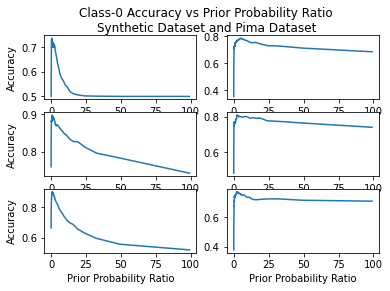

In [112]:
pd = pw/(1-pw)
fig,ax = plt.subplots(3,2)
fig.suptitle("Class-0 Accuracy vs Prior Probability Ratio\nSynthetic Dataset and Pima Dataset")
ax[0, 0].plot(pd, y1)
ax[0, 1].plot(pd, y4)
ax[1, 0].plot(pd, y2)
ax[1, 1].plot(pd, y5)
ax[2, 0].plot(pd, y3)
ax[2, 1].plot(pd, y6)
plt.setp(ax[-1, :], xlabel='Prior Probability Ratio')
plt.setp(ax[:, 0], ylabel='Accuracy')
plt.savefig('class0.png')

## Finding Decision Boundaries

In [38]:
# We will have to find correlation matrices so that they can be used for further analysis and calculations 
# of decision boundaries.

# Loading synthetic dataset
train = np.loadtxt("/Users/harsh/Downloads/synth.tr.txt",skiprows=1)
train_x = train[:,:-1]
train_y = train[:,-1].astype(int)

test_data = np.loadtxt("/Users/harsh/Downloads/synth.te.txt",skiprows=1)
test_x = test_data[:,:-1]
test_y = test_data[:,-1].astype(int)

# for class 0
arr = train_x[train_y == 0]
covs0 = np.cov(np.transpose(arr))
means0 = np.mean(arr, axis = 0)

# for class 1
arr = train_x[train_y == 1]
covs1 = np.cov(np.transpose(arr))
means1 = np.mean(arr, axis = 0)

# for euclidean distance
covavg = (covs0+covs1)/2
avg_var = np.mean(np.diagonal(covavg))

print(avg_var)
print(means0)
print(means1)
print(covs0)
print(covs1)
print(np.linalg.inv(covavg))

0.12565872285476903
[-0.22147024  0.32575494]
[0.07595431 0.68296891]
[[0.27680955 0.01122866]
 [0.01122866 0.03611906]]
[[ 0.15974786 -0.01557501]
 [-0.01557501  0.02995842]]
[[ 4.58430101  0.3015395 ]
 [ 0.3015395  30.28733354]]


Solving mathematically, we get that the decision boundaries as
(2a+2c)x1 + (2d-2b)x2 + a^2 + b^2 -c^2 -d^2 = 0, 
where a = class 0 mean for variable x1 = -0.22
b = class 0 mean for variable x2 = 0.325
c = class 1 mean for variable x1 = 0.075
d = class 1 mean for variable x2 = 0.068

In [71]:
y = train_y
x1 = train_x[:,0]
x2 = train_x[:,1]

In [74]:
# for Euclidean Distance
a, b, c, d = -0.22, 0.325, 0.075, 0.068
m = np.linspace(-1.5,1.5, num = 1000)
l = (a**2 + b**2 - c**2 - d**2 - 2*(a+c)*m)/(2*b - 2*d)

# for mahalanobis model
a, b, c, m11, m12, m21, m22 = 4.54, 0.301, 30.28, -0.22, 0.32, 0.075, 0.682
delta = 0.025
x1_range = np.arange(-1.5, 1.5, delta)
x2_range = np.arange(-0.5, 1, delta)
X, Y = np.meshgrid(x1_range, x2_range)

Z = a*(X - m11)**2 + c*(Y - m12)**2 + 2*b*(X - m11)*(Y - m12) - a*(X - m21)**2 - c*(Y - m22)**2 - 2*b*(X - m21)*(Y - m22)

# for Quadratic Classifier
a, b, c, d, e, f, m11, m12, m21, m22 = 4.54, 0.301, 30.28, 0.159, -0.015, 0.029, -0.22, 0.32, 0.075, 0.682
Z2 = a*(X - m11)**2 + c*(Y - m12)**2 + 2*b*(X - m11)*(Y - m12) - d*(X - m21)**2 - f*(Y - m22)**2 - 2*e*(X - m21)*(Y - m22)

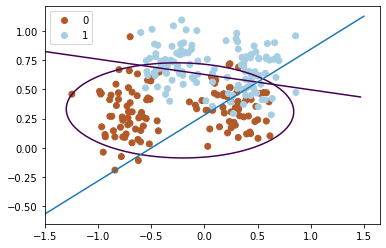

In [105]:
scatter = plt.scatter(x1, x2, c = y, cmap="Paired_r")
plt.legend(handles=scatter.legend_elements()[0], labels=[0,1])
plt.plot(m,l)
plt.contour(X, Y, Z, [3])
plt.contour(X, Y, Z2, [5])
plt.savefig('decision_boundaries.png')

If single modal Gaussian is not the right measure, I have to define a better classifier function. There are two clusters of data. For label zero, the two clusters have the means (-0.7, 0.25) and (0.4, 0.4). For label one, the two clusters have the means (-0.3, 0.75) and (0.4, 0.5). I will use those means in calculating the Euclidean distance by assuming both the clusters follow a different normal distribution. That is, class 0 is distributed as a sum of two normal curves. Similarly, class 1 is also distributed as a sum of two normal curves. I will also assume that the two clusters within the class are independent of each other, which is wrong but will allow me to have a good measure of class belonging.

In [94]:
def euclid_classifier_modified(xtrain, ytrain, xtest, ytest, pw):
    t1 = t.time()
    
    pw0 = pw
    pw1 = 1-pw

    nn, nf = xtest.shape

    means01 = [-0.7, 0.25]
    means02 = [0.4,0.4]
    
    means11 = [-0.3,0.75]
    means12 = [0.4,0.5]
    
    # initialising yhat array
    yhat = np.ones(len(ytest))
    
    for i in range(len(ytest)):
        #for class 0
        d = np.dot(xtest[i]-means01, xtest[i]-means01) + np.dot(xtest[i]-means02, xtest[i]-means02)
        g0 = -d/(2*avg_var) + np.log(pw0)
        
        # for class 1
        d = np.dot(xtest[i]-means11, xtest[i]-means11) + np.dot(xtest[i]-means12, xtest[i]-means12)
        g1 = -d/(2*avg_var) + np.log(pw1)
        
        # if g0>g1, then i belongs to 0, else to 1
        if(g0>g1):
            yhat[i] = 0
            
    overall_acc = np.sum(yhat == ytest)/len(ytest)
    class0_acc = np.sum(yhat[ytest == 0] == 0)/np.sum(ytest == 0)
    class1_acc = np.sum(yhat[ytest == 1] == 1)/np.sum(ytest == 1)
    
    t2 = t.time()
    tt = t2-t1
    
    return yhat, overall_acc, class0_acc, class1_acc, tt

In [95]:
# Loading synthetic dataset
train = np.loadtxt("/Users/harsh/Downloads/synth.tr.txt",skiprows=1)
train_x = train[:,:-1]
train_y = train[:,-1].astype(int)

test_data = np.loadtxt("/Users/harsh/Downloads/synth.te.txt",skiprows=1)
test_x = test_data[:,:-1]
test_y = test_data[:,-1].astype(int)

a,b,c,d,e = euclid_classifier_modified(train_x, train_y, test_x, test_y, 0.5) # assuming equal prior probability
print("Overall accuracy: ", b, "\nClass-0 Accuracy: ", c, "\nClass-1 Accuracy: ", d, "\nRuntime: ", e)

Overall accuracy:  0.738 
Class-0 Accuracy:  0.494 
Class-1 Accuracy:  0.982 
Runtime:  0.18066906929016113
